# Making Inference About a Client's Decision on Subscribing to a Term Deposit Based on The Last Day of Contact

# Introduction:
This project will dive into marketing data from a Portuguese banking institution to evaluate the effect of direct marketing campaigns on term deposit subscriptions. This dataset was obtained from the UCI machine learning repository from the following link: 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

In recent years, research has shown promising results of ‘direct marketing’ as an effective strategy to offer services directly to a specific customer (Menon et al., 2004). As the field of direct marketing has evolved, we want to further investigate the potential factors that could affect a client’s likelihood of subscribing to a term deposit via direct marketing, we have chosen this dataset which contains 1 dependent variable - successful/unsuccessful term deposit subscription, and other explanatory variables that could be potential determining factors that affect consumer decisions. 

A recent study conducted by Hülsheger et al. (2022) suggested lower levels of positive affect at the beginning of the week, uncovering patterns largely in line with popular idioms like “Blue Monday” and “Thank God it’s Friday”. Considering this study, we will explore how the last day of contacting a client influences the client's decision on subscribing to a term deposit. We will investigate and compare the proportions of the clients that subscribed to a term deposit when the last day of contact is Monday vs Friday. Then we will measure the standard deviation of these proportions.

**The question we will answer is: Does the last contact day of the week affect the term deposit subscription rate?**

In order to answer our inferential question, we will explore two random variables: the last contact day of the week (day_of_week) and whether or not the client has subscribed to a term deposit (term_sub). The day_of_week variable consists of five categories detailing each work day which we will then filter to Monday and Friday, and the term_sub variable consists of binary categories, yes or no.


# Part 1: Preliminary Exploratory Data Analysis:

In [31]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 12)
library(infer)

In [2]:
set.seed(2022)

#reading the dataset from web 
url<-"https://raw.githubusercontent.com/celike1/Data-for-Stat201/main/bank-additional.csv"
#initial data wrangling

bank_data<- read.csv(url, sep = ";")
bank_data<- subset(bank_data, select = -c(
                                         emp.var.rate,
                                         cons.price.idx,
                                         cons.conf.idx,
                                         euribor3m,
                                         nr.employed))

bank_data <- rename(bank_data,
       term_sub = y)

head(bank_data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,term_sub
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,no
2,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,no
3,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,no
4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,no
5,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,no
6,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,no


In [3]:
#final data wrangling 
#we are only going to compare the term subscription rate when the last day of contact is monday and friday
bank_data<- bank_data %>%
            filter(day_of_week == "mon" | day_of_week == "fri")%>%
            select(day_of_week, term_sub)
            
            
head(bank_data)

,day_of_week,term_sub
,<chr>,<chr>
1,fri,no
2,fri,no
3,fri,no
4,mon,no
5,mon,no
6,mon,no


In [4]:
#We check if there is any NA entries in our dataset data in our day_of_week and term_sub column.
sum(is.na(bank_data$day_of_week))
sum(is.na(bank_data$term_sub))

[1] 0

[1] 0

In [5]:
#Overall count of yes and no for term deposit subscription.
y_count<- bank_data %>% 
    group_by(term_sub) %>% 
    summarize(count=n()) 
y_count

#The proportion of yes and no for term deposit subscription
proportion<- bank_data %>%
    summarise (prop_yes = sum (term_sub == "yes")/ n(),
               prop_no = sum (term_sub == "no")/ n()
)
proportion

term_sub,count
<chr>,<int>
no,1442
yes,181


prop_yes,prop_no
<dbl>,<dbl>
0.1115219,0.8884781


In [6]:
#summary calculations for monday and friday
grouped<-bank_data %>% 
  group_by(day_of_week, term_sub) %>% 
  tally()

grouped

summary<-bank_data %>% 
      group_by(day_of_week) %>%
      summarise(n=n())
summary

day_of_week,term_sub,n
<chr>,<chr>,<int>
fri,no,685
fri,yes,83
mon,no,757
mon,yes,98


day_of_week,n
<chr>,<int>
fri,768
mon,855


In [62]:
#proportion of the clients that agreed to subscribe for term deposit.
prop_days<- bank_data %>%
    summarise (prop_mon = sum (term_sub == "yes")/ as.numeric(select(filter(summary, day_of_week=="mon"), n)),
               prop_fri = sum (term_sub == "yes")/ as.numeric(select(filter(summary, day_of_week=="fri"), n))
)

prop_days

prop_mon,prop_fri
<dbl>,<dbl>
0.2116959,0.2356771


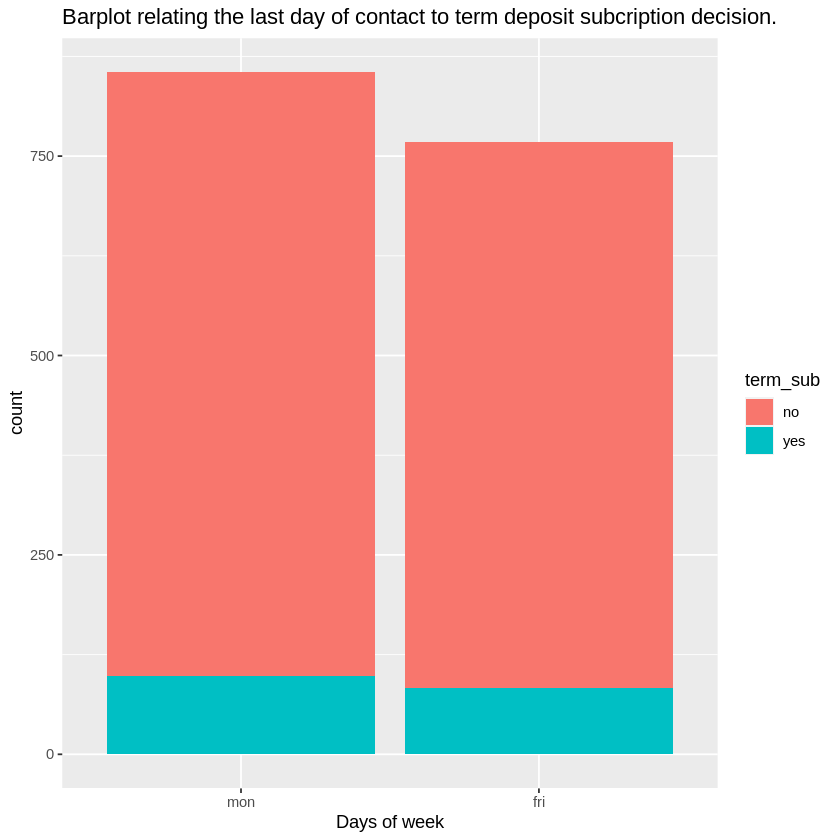

In [8]:
#Barplot relating the last day of contact to term deposit subcription decision.
day_order <- c("mon", "fri")

print(ggplot(bank_data, 
       aes(x = day_of_week, fill = term_sub)) +
  geom_bar() + 
  labs(x = "Days of week")+
  scale_x_discrete(limits = day_order)+
   ggtitle("Barplot relating the last day of contact to term deposit subcription decision."))




In [9]:
#Dataframe for subscription decision proportions
days <- c("Monday", "Friday")
sub_prop <- c(prop_days$prop_mon, prop_days$prop_tue, prop_days$prop_wed, prop_days$prop_thu, prop_days$prop_fri)

df_prop <- data.frame(days, sub_prop)
df_prop

days,sub_prop
<chr>,<dbl>
Monday,0.2116959
Friday,0.2356771


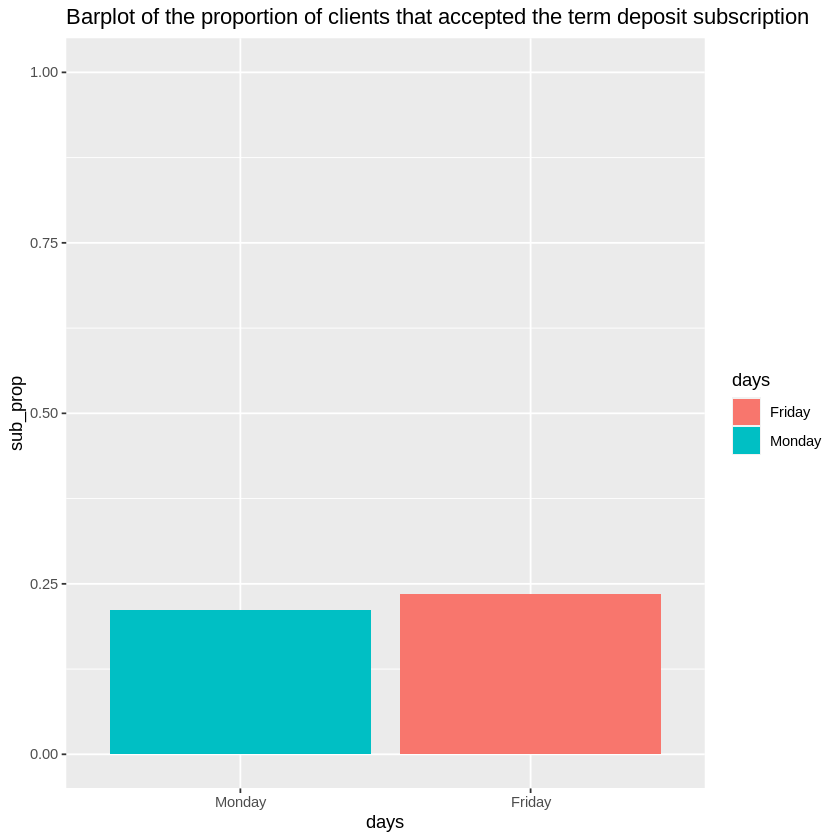

In [10]:
#Barplot of the proportion of clients that accepted the term deposit subscription
order <- c("Monday", "Friday")

print(ggplot(df_prop, aes(x = days, y = sub_prop, fill = days)) +
  geom_bar(stat = "identity")+
  scale_x_discrete(limits = order)+
  coord_cartesian(ylim = c(0, 1))+
  ggtitle("Barplot of the proportion of clients that accepted the term deposit subscription")
     )



# Methods: Plan

To benefit the stakeholders of the Portuguese bank, we draw various statistical inferences from our dataset in order to make conclusions on effective marketing practices. This report will provide an in-depth statistical analysis of two factors: first, by using bootstrapping and applying confidence interval theories, we will determine the mean percentage of clients in the general population who would subscribe to a term deposit, regardless of the day of the week. Following this, by applying hypothesis testing, we will determine the proportion of ‘yes’ responses whether calling on Monday or Friday. The results of our testing will let us infer a conclusion on how these days would affect the proportion of clients subscribing to a term deposit. By applying methods of statistical inference, this study can provide useful insights for the banking institution on how to modify their marketing strategy to best increase term deposit subscriptions.

We expect to see that calls made on Fridays would increase the proportion of term deposits made, this will likely be the result of the weekday characterization referenced in Rystrom’s article (1989) and additional articles referenced in this project. Looking forwards, a discussion could be made about how different groups would be more or less inclined to subscribe to the term deposit and further analysis could allow the firm to pursue a more targeted marketing strategy.


For the first section of the methods, we will explore the 90% confidence intervals of the bootstrapped proportion of clients who would subscribe on Monday vs Friday. We will then compare the results of our bootstrapping to if we were to conduct the same test using hypothesis testing.

In [11]:
# Here we are just restating the data for ease of reference while coding. We will then split it into two datasets, one dataset for Friday and one for Monday.
bank_data<- bank_data %>%
            filter(day_of_week == "mon" | day_of_week == "fri")%>%
            filter(!is.na(term_sub)) %>%
            select(day_of_week, term_sub)

head(bank_data)

,day_of_week,term_sub
,<chr>,<chr>
1,fri,no
2,fri,no
3,fri,no
4,mon,no
5,mon,no
6,mon,no


Once we finish creating the confidence intervals for Monday and Friday, we can compare them to our proportions calculated in the preliminary analysis section to visualize the difference!

In [12]:
bank_data_friday <- bank_data %>%
    filter(day_of_week == "fri") %>%
    select(day_of_week, term_sub)


bank_data_monday <- bank_data %>%
    filter(day_of_week == "mon") %>%
    select(day_of_week, term_sub)

# The resulting tables, should we run them, display a singular day of the week, grouped by different clients, with a random response variable term_sub either "yes" or "no".

Now that we have separated the two different days of the week we intend to analyze, we can take samples via bootstrapping of the different days and begin constructing our confidence intervals.

We will be using the infer workflow to take 1000 bootstraps of this data as follows:


In [13]:
set.seed(1502) # we set the seed to make sure our results can be replicated!

friday_sample <- bank_data_friday %>%
    rep_sample_n(size = 45, replace = FALSE) %>%
    ungroup() %>%
    select(term_sub)

friday_bootstrap <- friday_sample %>%
        specify(response = term_sub, success = "yes") %>%
        generate(type = 'bootstrap', reps = 1000) %>%
        calculate(stat = "prop")

head(friday_bootstrap)

replicate,stat
<int>,<dbl>
1,0.15555556
2,0.11111111
3,0.06666667
4,0.17777778
5,0.08888889
6,0.22222222


Here we can see the first few replicates of the statistic, our proportion of success in this case (success being when term_sub == 'yes') for Friday. Now lets conduct the bootstrap for Monday

In [14]:
set.seed(1502)

monday_sample <- bank_data_monday %>%
    rep_sample_n(size = 45, replace = FALSE) %>%
    ungroup() %>%
    select(term_sub)


monday_bootstrap <- monday_sample %>%
    specify(response = term_sub, success = "yes") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = 'prop')

head(monday_bootstrap)

replicate,stat
<int>,<dbl>
1,0.08888889
2,0.26666667
3,0.15555556
4,0.26666667
5,0.15555556
6,0.20000000


Now that we have the bootstraps for both Monday and Friday, we can proceed with constructing the confidence intervals for both, and then lastly, produce a plot for both Monday and Friday.

In [15]:
set.seed(1502)

friday_ci <- friday_bootstrap %>%
    get_confidence_interval(level = 0.9, type = 'percentile')

monday_ci <- monday_bootstrap %>%
    get_confidence_interval(level = 0.9, type = 'percentile')

head(friday_ci)
head(monday_ci)

lower_ci,upper_ci
<dbl>,<dbl>
0.06666667,0.2444444


lower_ci,upper_ci
<dbl>,<dbl>
0.1111111,0.2888889


Here we take the mean of both bootstraps, to better visualize the differences between the Monday proportion and Friday proportion.

In [16]:
fri_mean <- friday_bootstrap %>%
    summarise(mean = mean(stat)) %>%
    select(mean)

fri_mean

mon_mean <- monday_bootstrap %>%
    summarise(mean = mean(stat)) %>%
    select(mean)

mon_mean

mean
<dbl>
0.1541556


mean
<dbl>
0.1987111


Based on the confidence intervals calculated above, we can already see that the range of both confidence intervals is both 0.178. However both the upper and lower CI for monday is higher than Friday. Already indicating that the overall proportion of "yes" responses on Monday is greater. Which doesn't fully match our earlier plots in the preliminary data analysis but thats alright! Let's do a plot for both confidence intervals to visualize it better. In addition, we'll also add a vertical line displaying the mean on each plot.

Warning message:
“Ignoring unknown parameters: binwidth”
Warning message:
“Ignoring unknown parameters: binwidth”


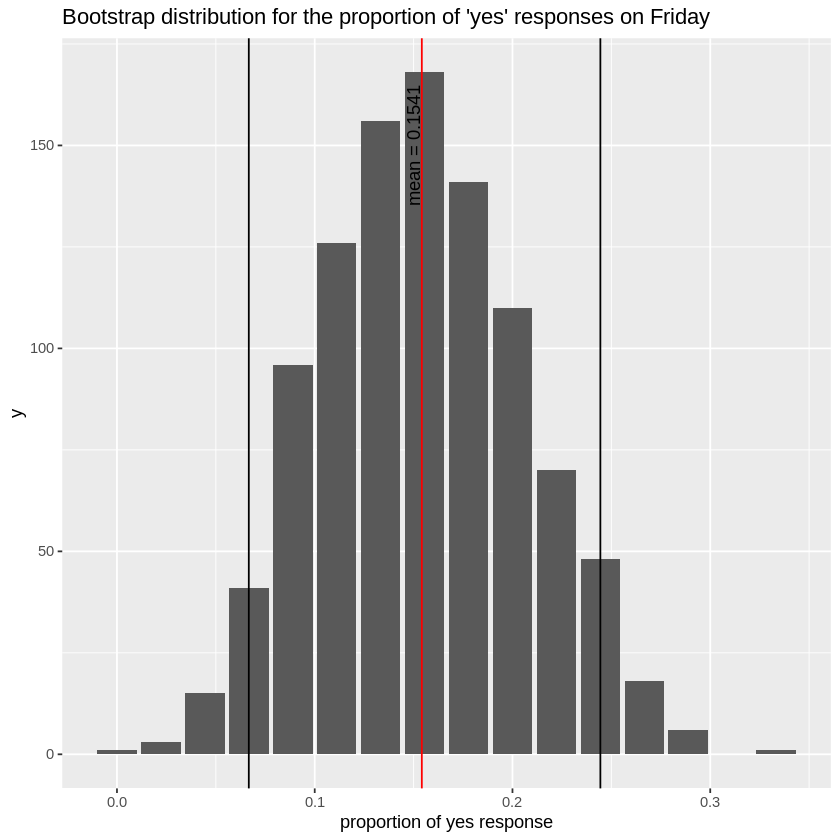

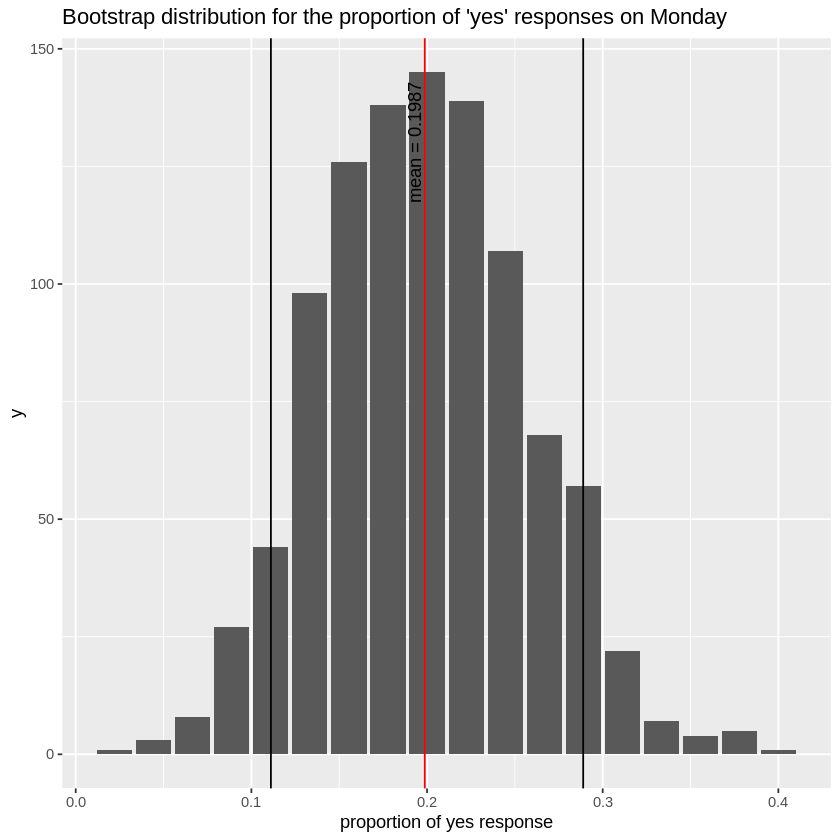

In [17]:
friday_ci_plot <- friday_bootstrap %>%
    ggplot(aes(x = stat)) +
    geom_bar(binwidth = 10) +
    geom_vline(xintercept = fri_mean$mean, color = "red")+
    annotate("text", x=0.15, y=150, label="mean = 0.1541", angle=90)+
    geom_vline(xintercept = friday_ci[[1]]) +
    geom_vline(xintercept = friday_ci[[2]])+
    ggtitle("Bootstrap distribution for the proportion of 'yes' responses on Friday") +
    xlab("proportion of yes response")

monday_ci_plot <- monday_bootstrap %>%
    ggplot(aes(x = stat)) +
    geom_bar(binwidth = 10) +
    geom_vline(xintercept = mon_mean$mean, color = "red")+
    annotate("text", x=0.193, y=130, label="mean = 0.1987", angle=90)+
    geom_vline(xintercept = monday_ci[[1]]) +
    geom_vline(xintercept = monday_ci[[2]])+
    ggtitle("Bootstrap distribution for the proportion of 'yes' responses on Monday") +
    xlab("proportion of yes response")

friday_ci_plot
monday_ci_plot

With these two plots, we can better visualize the proportion of "yes" responses for Friday and Monday. Monday overall has a higher count of "yes" responses with higher proportion than Friday. Which is different from our preliminary data analysis. Where we saw that Friday had a higher proportion. Part of this could be attributed to the issues with bootstrapping. Where your bootstrap entirely depends on your original sample. The sample may have been slightly leaning towards a lower proportion on Friday. More reasons for the difference in results will be discussed later on in the discussion and results portion of this paper.

# Hypothesis Testing

H0: Term deposit subscription rate is the same when the last day of contact is Monday and when the last day of contact is Friday.

HA: Term deposit subscription rate is higher when the last day of contact is Friday.




In [32]:
#infer package workflow
null_distribution <- bank_data %>% 
  specify(formula = term_sub ~ day_of_week, success = "yes") %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate (stat = "diff in props", order = c("fri", "mon"))

null_distribution

replicate,stat
<int>,<dbl>
1,-0.006546966
2,-0.001603618
3,-0.011490314
4,-0.001603618
5,0.018169773
6,0.003339730
⋮,⋮
995,-0.016433662
996,0.018169773


In [34]:
obs_diff_prop <- bank_data %>%
    specify(term_sub ~ day_of_week, success = "yes") %>%
    calculate(stat= "diff in props", order = c("fri", "mon"))
obs_diff_prop

stat
<dbl>
-0.006546966


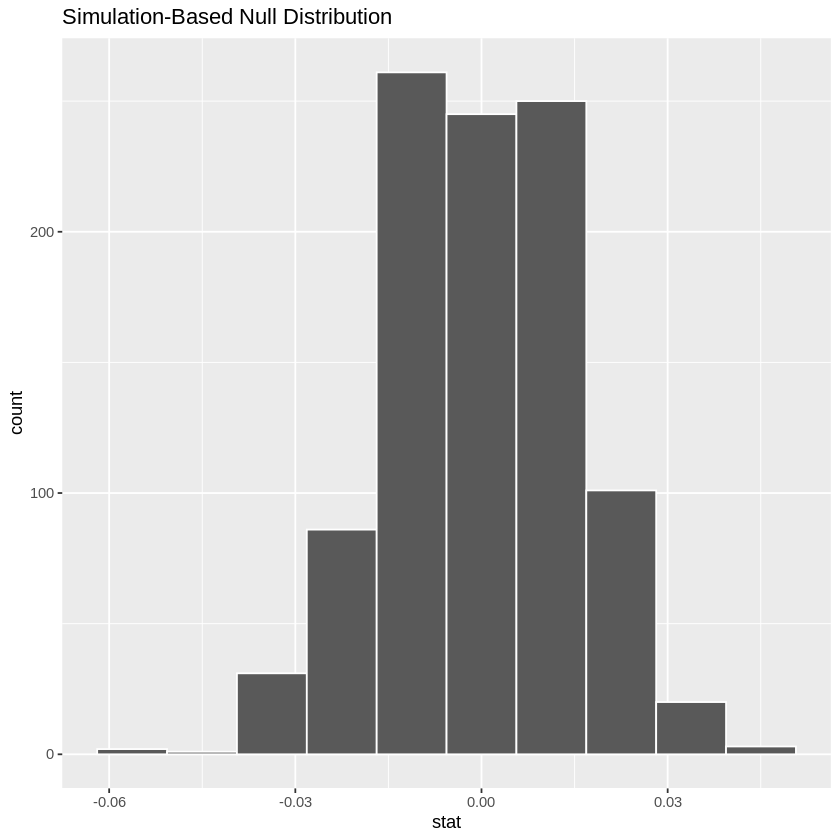

In [36]:
visualize(null_distribution, bins =10)

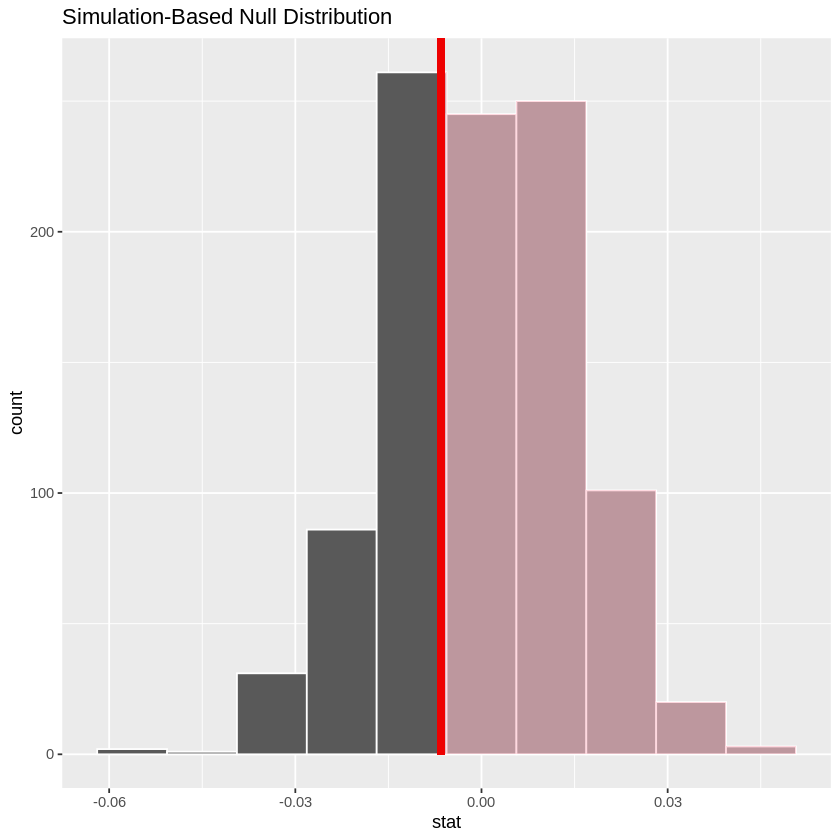

In [41]:
visualize(null_distribution, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_prop, direction = "right")

In [45]:
p_value<- null_distribution %>%
          get_p_value(obs_stat = obs_diff_prop, direction = "right")
p_value

p_value
<dbl>
0.692


# Theory-based hypothesis tests

In [83]:
#test statistic
sub_summary <-
    bank_data %>% 
    group_by(day_of_week) %>% 
    summarise(n = n(), 
              p_hat = mean(term_sub == 'yes')) %>% 
    pivot_wider(names_from = day_of_week, values_from = c(n, p_hat)) %>% 
    mutate(prop_diff = p_hat_fri - p_hat_mon)

sub_summary

n_fri,n_mon,p_hat_fri,p_hat_mon,prop_diff
<int>,<int>,<dbl>,<dbl>,<dbl>
768,855,0.1080729,0.1146199,-0.006546966


In [91]:
sub_summary <-
    sub_summary %>% 
    mutate(p = (p_hat_fri * n_fri + p_hat_mon * n_mon)/(n_mon+n_fri),
           null_std_error = sqrt(p*(1-p)*(1/n_fri+1/n_mon))) %>% 
    select(-p)

sub_summary

n_fri,n_mon,p_hat_fri,p_hat_mon,prop_diff,null_std_error
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
768,855,0.1080729,0.1146199,-0.006546966,0.01564945


In [92]:
sub_summary <- 
    sub_summary  %>% 
    mutate(p_value = 2 * pnorm(prop_diff, 0, null_std_error, lower.tail= FALSE))


sub_summary

n_fri,n_mon,p_hat_fri,p_hat_mon,prop_diff,null_std_error,p_value
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768,855,0.1080729,0.1146199,-0.006546966,0.01564945,1.32431


In [95]:
sub_prop_test <- 
    tidy(prop.test(x = c(sub_summary %>% mutate(success = n_fri * p_hat_fri) %>% pull(success),
                    sub_summary %>% mutate(success = n_mon * p_hat_mon) %>% pull(success)),
              n = c(sub_summary$n_fri, sub_summary$n_mon),
                   alternative = c("greater"),
             correct=FALSE))


sub_prop_test

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1080729,0.1146199,0.1750178,0.6621549,1,-0.03225117,1,2-sample test for equality of proportions without continuity correction,greater


# References

Hülsheger, U. R., Uitdewilligen, S., Zijlstra, F. R., & Walkowiak, A. (2022). Blue Monday, yellow Friday? investigating work anticipation as an explanatory mechanism and boundary conditions of weekly affect trajectories. Journal of Occupational Health Psychology, 27(4), 359–376. https://doi.org/10.1037/ocp0000330 

Menon, A. M., Deshpande, A. D., George, M. Z., & Perri, M. (2004). A model assessing the effectiveness of direct-TOCONSUMER advertising: Integration of concepts and measures from marketing and Healthcare. International Journal of Advertising, 23(1), 91–117. https://doi.org/10.1080/02650487.2004.11072874 

Rystrom, D. S., & Benson, E. D. (1989). Investor psychology and the day-of-the-week effect. Financial Analysts Journal, 45(5), 75–78. https://doi.org/10.2469/faj.v45.n5.75 